In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [4]:
d=pd.read_csv("housing.csv")
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0      

In [5]:
#displays first five rows of the data
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print("total no of samples",d.size)

total no of samples 206400


In [7]:
#checking for the null values
print("the total noof null values")
d.isnull().sum()

the total noof null values


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:

d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#calculating mean 
np.mean(d['total_bedrooms'])

537.8705525375618

In [10]:
#filling missing values with the mean
d['total_bedrooms'] =d['total_bedrooms'].fillna(np.mean(d['total_bedrooms']))

In [11]:
#checking for null values
print("the total noof null values")
d.isnull().sum()

the total noof null values


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
#describing of the data
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
#finding unique values 
d['ocean_proximity'].unique

<bound method Series.unique of 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY
10       NEAR BAY
11       NEAR BAY
12       NEAR BAY
13       NEAR BAY
14       NEAR BAY
15       NEAR BAY
16       NEAR BAY
17       NEAR BAY
18       NEAR BAY
19       NEAR BAY
20       NEAR BAY
21       NEAR BAY
22       NEAR BAY
23       NEAR BAY
24       NEAR BAY
25       NEAR BAY
26       NEAR BAY
27       NEAR BAY
28       NEAR BAY
29       NEAR BAY
           ...   
20610      INLAND
20611      INLAND
20612      INLAND
20613      INLAND
20614      INLAND
20615      INLAND
20616      INLAND
20617      INLAND
20618      INLAND
20619      INLAND
20620      INLAND
20621      INLAND
20622      INLAND
20623      INLAND
20624      INLAND
20625      INLAND
20626      INLAND
20627      INLAND
20628      INLAND
20629      INLAND
20630      INLAND
20631      INLAND
20632      INLA

In [14]:
d['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
#converting string values to numerical values using lable encoding
le=LabelEncoder()
d['ocean_proximity'] = le.fit_transform(d['ocean_proximity'])

In [16]:

dum=pd.get_dummies(d['ocean_proximity'])
d=pd.concat([d,dum],axis=1)
dum.head()

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [17]:
#standardizing  data
d['housing_median_age']=d.housing_median_age.astype(float)
d['total_rooms']=d.total_rooms.astype(float)
d['population']=d.population.astype(float)
d['households']=d.households.astype(float)
d['median_house_value']=d.median_house_value.astype(float)
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,0,1,0


In [18]:
#spliting the data 
X=d.drop('median_house_value', axis=1)
y=d.median_house_value
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0      

In [19]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
7        241400.0
8        226700.0
9        261100.0
10       281500.0
11       241800.0
12       213500.0
13       191300.0
14       159200.0
15       140000.0
16       152500.0
17       155500.0
18       158700.0
19       162900.0
20       147500.0
21       159800.0
22       113900.0
23        99700.0
24       132600.0
25       107500.0
26        93800.0
27       105500.0
28       108900.0
29       132000.0
           ...   
20610     45500.0
20611     47000.0
20612     48300.0
20613     53400.0
20614     58000.0
20615     57500.0
20616     55100.0
20617     70800.0
20618     63400.0
20619     99100.0
20620    100000.0
20621     77500.0
20622     67000.0
20623     65500.0
20624     87200.0
20625     72000.0
20626     93800.0
20627    162500.0
20628     92400.0
20629    108300.0
20630    112000.0
20631    107200.0
20632    115600.0
20633     98300.0
20634    1

In [20]:
X.shape

(20640, 14)

In [21]:
y.shape

(20640,)

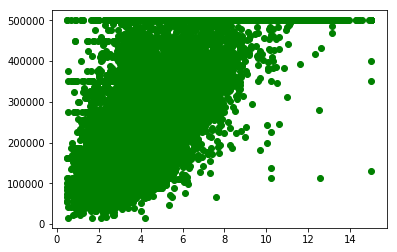

In [56]:
#describing relation using graph
plt.scatter(d.median_income,d.median_house_value, color="green")
plt.show()


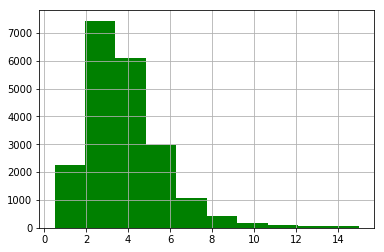

In [57]:

d['median_income'].hist(bins=10, color="green")

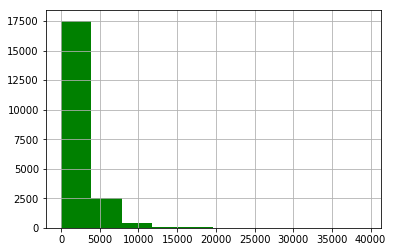

In [58]:
d['total_rooms'].hist(bins=10, color="green")

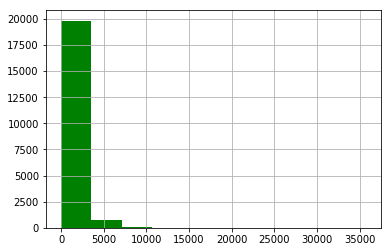

In [59]:
d['population'].hist(bins=10, color="green")


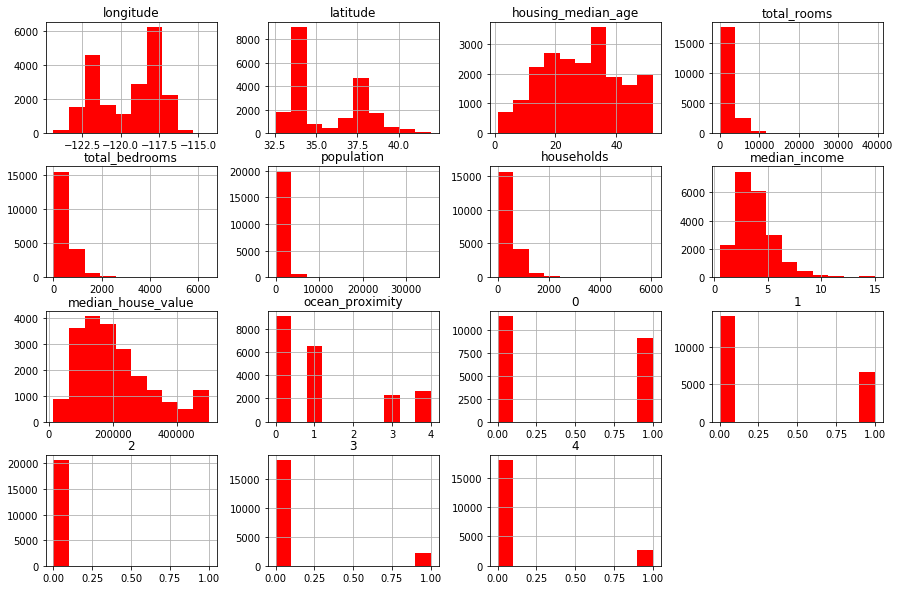

In [60]:
d.hist(figsize=(15,10), color = 'red')
plt.show()

In [27]:
#spliting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, 
                                                     random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 14)
(4128, 14)
(16512,)
(4128,)


In [28]:
#applying linear regression model
#finding rmse values 
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train, y_train)
predictions = l.predict(X_test)
rss=((y_test-predictions)**2).sum()
mse=np.mean((y_test-predictions)**2)
print(np.sqrt(np.mean((y_test-predictions)**2)))

68689.20561705154


In [29]:

#applying decision tree with single parameter
#finding rmse values 
dtree_reg = DecisionTreeRegressor(max_depth=10)
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
pred = dtree_reg.predict(X_test)
rss=((y_test-pred)**2).sum()
mse=np.mean((y_test-pred)**2)
print(np.sqrt(np.mean((y_test-pred)**2)))

61869.224539707204


In [31]:
#applying decision tree with multilple parameter
#finding rmse values 
dtree_reg = DecisionTreeRegressor(max_depth=20,max_features = 'sqrt',min_samples_leaf = 2,min_samples_split = 3,random_state= 42)
dtree_reg.fit(X_train, y_train)
pred = dtree_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

66365.72523154631


In [32]:
wavg_pred = l.predict(X)*0.1 + dtree_reg.predict(X)*0.9
wavg_pred

array([476597.79055238, 369184.47736196, 397082.66179768, ...,
        78369.90466044,  90425.15830499,  86572.87191946])

In [33]:
#applying random forest
#finding rmse values 
#finding accuracy score
from sklearn.ensemble import RandomForestRegressor
rt=RandomForestRegressor(max_depth=30,min_samples_leaf=20,max_features='sqrt',n_estimators=1000)
rt.fit(X_train,y_train)
predt=rt.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predt)))
accuracy=rt.score(X_test,y_test)
print(accuracy*100,'%')

55520.71623506497
76.35999584201515 %


In [41]:
#spliting the data for test and train 
#appliying linear regression with one indipendent variable
#finding rmse values 
#finding accuracy score
c=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
a=X.drop(c,axis=1)
b=d["median_house_value"]
X_train1,X_test1,y_train1,y_test1 =model_selection.train_test_split(a,b,test_size=0.2,random_state=45)
print("x_train1 shape :",X_train1.shape)
print("x_test1 shape :",X_test1.shape)
print("y_train1 shape :",y_train1.shape)
print("y_test1 shape :",y_test1.shape)

x_train1 shape : (16512, 6)
x_test1 shape : (4128, 6)
y_train1 shape : (16512,)
y_test1 shape : (4128,)


In [46]:
le1 = LinearRegression()
le1.fit(X_train1, y_train1)
pred2=le1.predict(X_test1)
accuracy=le1.score(X_test1,y_test1)
print(accuracy*100,'%')
print(np.sqrt(mean_squared_error(y_test1, pred2)))

58.61603730197651 %
74103.70824177629


ValueError: x and y must be the same size

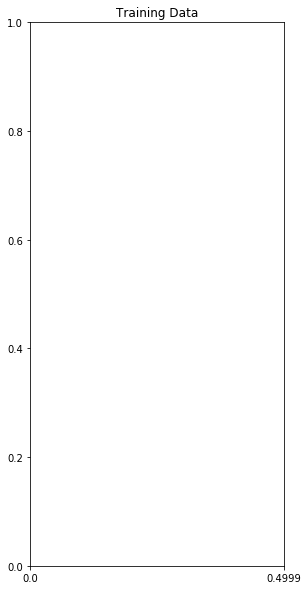

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train1,y_train1,color="red")
plt.plot(X_train1,le1.predict(X_train1),color="blue")
plt.Xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

Text(0,0.5,' Predicted median_house_value')

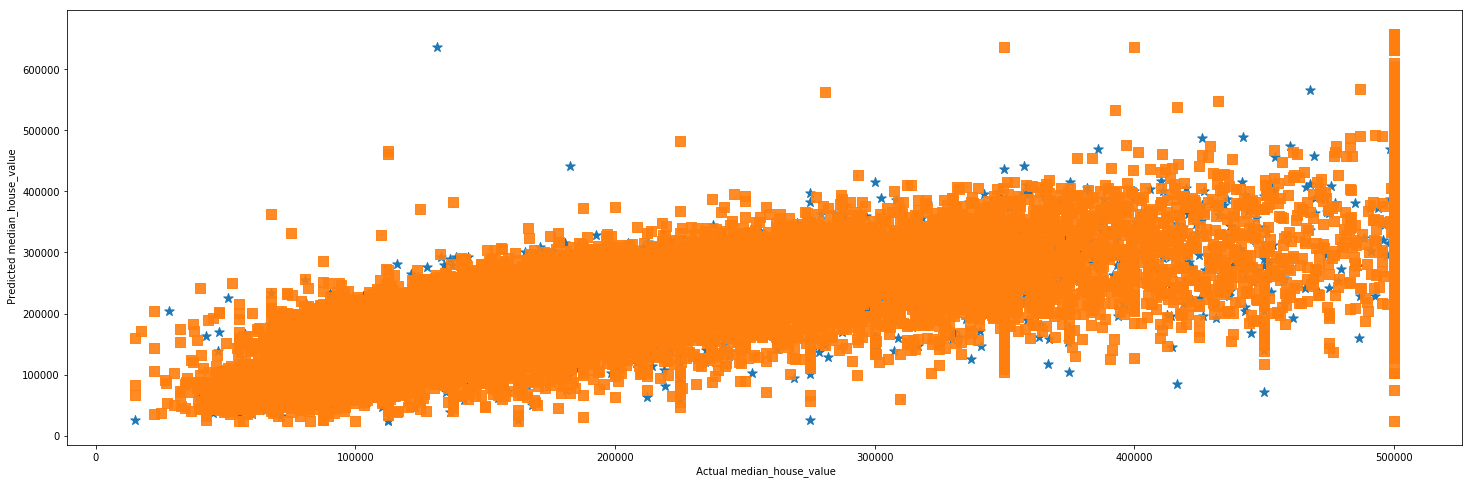

In [54]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test1,pred2,marker="*",s=100)
plt.scatter(y_train1,le1.predict(X_train1),marker="s",s=90,alpha=0.9)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")